<a href="https://colab.research.google.com/github/arko-14/AlexNet-from-scratch/blob/main/lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator # updated import
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

# Parameters
img_height, img_width = 64, 64
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

def preprocess_train(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = data_augmentation(image, training=True)
    return image, label

# Preprocessing function for test
def preprocess_test(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

dataset = dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch for performance
dataset = dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 30, 30, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 13, 13, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │         324,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,721 (1.29 MB)

 Trainable params: 337,721 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential()

# First convolutional layer:
model.add(Conv2D(6, kernel_size=(5,5),
                 padding="valid", activation="tanh", input_shape=(64,64,3)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))

# Second convolutional layer: 256 filters, 5x5 kernel, same padding.
model.add(Conv2D(16, kernel_size=(5,5),
                 padding="valid", activation="tanh"))
#model.add(tf.keras.layers.BatchNormalization())

model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))


model.add(Flatten())

model.add(Dense(120, activation='tanh', input_shape=(2704,)))
model.add(Dropout(0.1))
model.add(Dense(84, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(dataset,
                    epochs=20,
                    validation_data=test_dataset,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3), checkpoint]) # Add checkpoint callback

Epoch 1/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5412 - loss: 0.6972
Epoch 1: val_loss improved from inf to 0.66478, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.5413 - loss: 0.6972 - val_accuracy: 0.6010 - val_loss: 0.6648
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5861 - loss: 0.6690
Epoch 2: val_loss did not improve from 0.66478
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5861 - loss: 0.6690 - val_accuracy: 0.5646 - val_loss: 0.6843
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5773 - loss: 0.6733
Epoch 3: val_loss improved from 0.66478 to 0.63569, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.5773 - loss: 0.6733 - val_accuracy: 0.6306 - val_loss: 0.6357
Epoch 4/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6140 - loss: 0.6434
Epoch 4: val_loss improved from 0.63569 to 0.63502, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6140 - loss: 0.6434 - val_accuracy: 0.6200 - val_loss: 0.6350
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6293 - loss: 0.6340
Epoch 5: val_loss improved from 0.63502 to 0.63052, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.6293 - loss: 0.6340 - val_accuracy: 0.6310 - val_loss: 0.6305
Epoch 6/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6338 - loss: 0.6271
Epoch 6: val_loss improved from 0.63052 to 0.61493, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.6339 - loss: 0.6271 - val_accuracy: 0.6628 - val_loss: 0.6149
Epoch 7/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6398 - loss: 0.6221
Epoch 7: val_loss did not improve from 0.61493
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6398 - loss: 0.6221 - val_accuracy: 0.6604 - val_loss: 0.6216
Epoch 8/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6402 - loss: 0.6234
Epoch 8: val_loss improved from 0.61493 to 0.61291, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6402 - loss: 0.6234 - val_accuracy: 0.6630 - val_loss: 0.6129
Epoch 9/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6456 - loss: 0.6188
Epoch 9: val_loss improved from 0.61291 to 0.60964, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6456 - loss: 0.6188 - val_accuracy: 0.6662 - val_loss: 0.6096
Epoch 10/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6470 - loss: 0.6199
Epoch 10: val_loss did not improve from 0.60964
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6470 - loss: 0.6198 - val_accuracy: 0.6512 - val_loss: 0.6242
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6500 - loss: 0.6156
Epoch 11: val_loss improved from 0.60964 to 0.60773, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6500 - loss: 0.6156 - val_accuracy: 0.6664 - val_loss: 0.6077
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6539 - loss: 0.6137
Epoch 12: val_loss improved from 0.60773 to 0.60367, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6539 - loss: 0.6137 - val_accuracy: 0.6680 - val_loss: 0.6037
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6566 - loss: 0.6117
Epoch 13: val_loss improved from 0.60367 to 0.59900, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.6566 - loss: 0.6117 - val_accuracy: 0.6758 - val_loss: 0.5990
Epoch 14/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6581 - loss: 0.6070
Epoch 14: val_loss improved from 0.59900 to 0.59641, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6581 - loss: 0.6070 - val_accuracy: 0.6752 - val_loss: 0.5964
Epoch 15/20
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6643 - loss: 0.6041
Epoch 15: val_loss did not improve from 0.59641
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6643 - loss: 0.6041 - val_accuracy: 0.6708 - val_loss: 0.6015
Epoch 16/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6625 - loss: 0.6059
Epoch 16: val_loss improved from 0.59641 to 0.59638, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6625 - loss: 0.6059 - val_accuracy: 0.6780 - val_loss: 0.5964
Epoch 17/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6643 - loss: 0.6034
Epoch 17: val_loss did not improve from 0.59638
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6643 - loss: 0.6034 - val_accuracy: 0.6670 - val_loss: 0.6019
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6634 - loss: 0.6035
Epoch 18: val_loss did not improve from 0.59638
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6634 - loss: 0.6035 - val_accuracy: 0.6540 - val_loss: 0.6152
Epoch 19/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6727 - loss: 0.5981
Epoch 19: val_loss did not improve from 0.59638
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6727 - loss: 0.5981 - val_accuracy: 0.6672 - val_loss: 0.6054


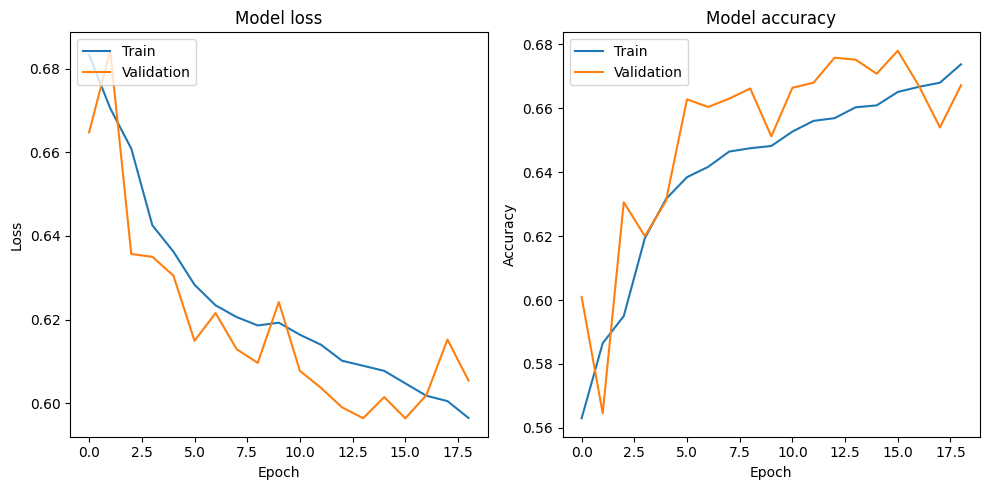

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from PIL import Image

def preprocess_single_image(image_path):
    img = Image.open(image_path).resize((64, 64))
    img_array = np.array(img)
    img_array = img_array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example usage
image_path = "/content/images.jpeg"
preprocessed_image = preprocess_single_image(image_path)

# Make prediction
prediction = model.predict(preprocessed_image)
print(prediction) #probability of cat or dog
if prediction[0][0] > 0.2:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.27228808]]
Predicted class: Dog


In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6759 - loss: 0.6092
Test Accuracy: 66.72%
